# What is Temperature in LLMs?
Temperature is a parameter that determines the probability distribution of the next word in text generation. It controlling the randomness and divesity of the output:

### Low Temperature (e.g., 0.0–0.4):
Results are deterministic, precise, and repetitive.

### Moderate Temperature (e.g., 0.5–1.0):
Outputs become more diverse while maintaining coherence.

### High Temperature (e.g., 1.1–2.0):
Text becomes creative and experimental, often at the cost of relevance and focus.

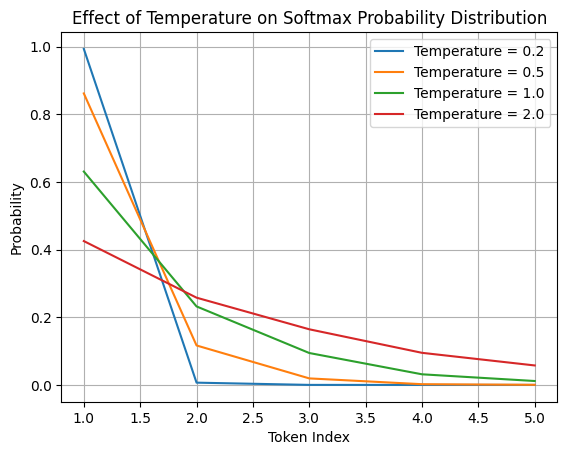

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softmax_with_temperature(logits, temperature):
    logits = np.array(logits)  # Convert input list to numpy array
    exp_logits = np.exp(logits / temperature) # Scale logits by temperature and exponentiate
    return exp_logits / np.sum(exp_logits)  # Normalize to get probabilities

# Raw scores for 5 tokens
logits = [2.0, 1.0, 0.1, -1.0, -2.0]
temperatures = [0.2, 0.5, 1.0, 2.0]

# Calculate probabilities for each temperature
probabilities = {temp: softmax_with_temperature(logits, temp) for temp in temperatures}

# Plotting
for temp, probs in probabilities.items():
    plt.plot(range(1, len(probs) + 1), probs, label=f'Temperature = {temp}')

plt.title("Effect of Temperature on Softmax Probability Distribution")
plt.xlabel("Token Index")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

# What The Numbers Mean
Let’s look at the probabilities for different temperatures:

## Temperature = 0.2 (Very Cold)
Token 1: 99.3%

Token 2: 0.67%

Other tokens: nearly 0%

This makes the model very focused on the highest-scoring token.

## Temperature = 2.0 (Very Hot)
Token 1: 42.5%

Token 2: 25.8%

Token 3: 16.4%

Token 4: 9.5%

Token 5: 5.8%

This spreads out the probabilities, making the model more random.

# Visual Explanation
The plot shows how temperature affects token selection:

## Blue line (T=0.2):
Very steep, almost all probability goes to the highest-scoring token

## Orange line (T=0.5):
Still favors high-scoring tokens but less extremely

## Green line (T=1.0):
Moderate distribution

Red line (T=2.0): Flatter distribution, giving more chances to lower-scoring tokens

# Example of how temperature works in text generation (Using GROQ API)

Below is a simple python code which uses GROQ API for accessing LLAMA 3.3 70B parameter model.

In [2]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 2.4 MB/s eta 0:00:00


Collecting groq
  Downloading groq-0.34.0-py3-none-any.whl.metadata (16 kB)
Requirement already satisfied: anyio<5,>=3.5.0 in /usr/local/lib/python3.12/dist-packages (from groq) (4.11.0)
Requirement already satisfied: distro<2,>=1.7.0 in /usr/local/lib/python3.12/dist-packages (from groq) (1.9.0)
Requirement already satisfied: httpx<1,>=0.23.0 in /usr/local/lib/python3.12/dist-packages (from groq) (0.28.1)
Requirement already satisfied: pydantic<3,>=1.9.0 in /usr/local/lib/python3.12/dist-packages (from groq) (2.11.10)
Requirement already satisfied: sniffio in /usr/local/lib/python3.12/dist-packages (from groq) (1.3.1)
Requirement already satisfied: typing-extensions<5,>=4.10 in /usr/local/lib/python3.12/dist-packages (from groq) (4.15.0)
Requirement already satisfied: idna>=2.8 in /usr/local/lib/python3.12/dist-packages (from anyio<5,>=3.5.0->groq) (3.11)
Requirement already satisfied: certifi in /usr/local/lib/python3.12/dist-packages (from httpx<1,>=0.23.0->groq) (2025.10.5)
Requirement already satisfied: httpcore==1.* in /usr/local/lib/python3.12/dist-packages (from httpx<1,>=0.23.0->groq) (1.0.9)
Requirement already satisfied: h11>=0.16 in /usr/local/lib/python3.12/dist-packages (from httpcore==1.*->httpx<1,>=0.23.0->groq) (0.16.0)
Requirement already satisfied: annotated-types>=0.6.0 in /usr/local/lib/python3.12/dist-packages (from pydantic<3,>=1.9.0->groq) (0.7.0)
Requirement already satisfied: pydantic-core==2.33.2 in /usr/local/lib/python3.12/dist-packages (from pydantic<3,>=1.9.0->groq) (2.33.2)
Requirement already satisfied: typing-inspection>=0.4.0 in /usr/local/lib/python3.12/dist-packages (from pydantic<3,>=1.9.0->groq) (0.4.2)
Downloading groq-0.34.0-py3-none-any.whl (135 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 2.9 MB/s eta 0:00:00
Installing collected packages: groq
Successfully installed groq-0.34.0

### GROQ
GROQ (short for Generative Retrieval Optimized Query) is a chip and AI inference engine developed by Groq Inc.

It's not a model, but hardware and software optimized to run AI models super fast, especially large language models (LLMs).

Think of it like this: if LLaMA is a powerful brain, then GROQ is a lightning-fast body helping it move.

Groq is known for ultra-low latency, meaning it can return responses almost instantly, which is perfect for real-time AI chatbots, robotics, and edge AI.

### GROQ
GROQ (short for Generative Retrieval Optimized Query) is a chip and AI inference engine developed by Groq Inc.

It's not a model, but hardware and software optimized to run AI models super fast, especially large language models (LLMs).

Think of it like this: if LLaMA is a powerful brain, then GROQ is a lightning-fast body helping it move.

Groq is known for ultra-low latency, meaning it can return responses almost instantly, which is perfect for real-time AI chatbots, robotics, and edge AI.

## LLaMA
LLaMA stands for Large Language Model Meta AI.

It's an open-source language model family developed by Meta (Facebook).

Similar to OpenAI’s GPT models, it can do:

Text generation

Summarization

Translation

Coding

Reasoning, etc.

There are different versions: LLaMA 1, 2, and 3 (latest as of 2024).

LLaMA models are trained on huge datasets and optimized to run efficiently, even on smaller hardware (compared to GPT-4).

In [3]:
import numpy as np
from groq import Groq

def generate_completion(client, model, prompt, temperature):
    completion = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
        max_tokens=100,
        top_p=1,
        stream=False,
        stop=None,
    )
    return completion.choices[0].message.content

def main():

    # Note: A valid 'client' object (e.g., from `client = Groq(api_key="your_api_key")`) would be needed here.
    # For this example, 'client' is not defined, so this code will result in an error if executed as-is.
    # You would need to initialize the Groq client with your API key before calling generate_completion.
    # For demonstration, I'm commenting out the execution part.
    # client = Groq(api_key="your_groq_api_key_here")

    model = "llama-3.3-70b-versatile"
    prompt = "Explain AI in exactly 50 words. Do not exceed this limit."

    # Generate temperatures from 0 to 2 with a step of 0.1
    temperatures = np.arange(0, 2.1, 0.1)

    # The following loop requires a 'client' object to be initialized.
    # for temp in temperatures:
    #     print(f"\nTemperature: {temp:.1f}")
    #     result = generate_completion(client, model, prompt, temp)
    #     print(result)
    #     #divider line
    #     print("-" * 50)

if __name__ == "__main__":
    main()

```python
client.chat.completions.create(...)
```

client: This is your Groq client (already authenticated with your API key).

.chat: You're using the chat endpoint (for conversational prompts, like ChatGPT).

.completions: Refers to chat-based completions (responses to messages).

.create(...): This method sends a new request to generate a completion.

top_p=1 — Nucleus Sampling (a.k.a. "top-p sampling")

Purpose: Controls how many of the most likely words are considered when picking the next token.

top_p sets a cumulative probability threshold.

top llma.png

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

In [ ]:
from nltk.tokenize import word_tokenize

sentence = "Machine learning is fun!"
tokens = word_tokenize(sentence)

print("Tokens:", tokens)

Tokens: ['Machine', 'learning', 'is', 'fun', '!']

In [ ]:
from transformers import BertTokenizer

# Load pretrained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

sentence = "Unhappiness is contagious."
tokens = tokenizer.tokenize(sentence)

print("Subtokens:", tokens)

Subtokens: ['un', '##happiness', 'is', 'contagious', '.']

In [ ]:
import numpy as np
from numpy.linalg import norm

A = np.array([2, 1, 2, 3, 2, 9])
B = np.array([3, 4, 2, 4, 5, 5])

# compute cosine similarity
cosine = np.dot(A, B) / (norm(A) * norm(B))
print("Cosine Similarity:", cosine)

Cosine Similarity: 0.9653835694285799

In [ ]:
from transformers import AutoTokenizer

# Load a tokenizer (e.g., BERT)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text = "Machine learning is transforming materials science!"

# Tokenize
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.encode(text)

print("Tokens:", tokens)
print("Token IDs:", token_ids)

Tokens: ['machine', 'learning', 'is', 'transforming', 'materials', 'science', '!']
Token IDs: [101, 3600, 4443, 2003, 15006, 4478, 2697, 106, 102]